# Laboratorium 4


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import time
from typing import List, Tuple
import itertools

In [2]:
INCH_TO_PIXEL = 96


### Zadanie 1 - problem komiwojażera 

Losowanie n punktów na płaszczyźnie

In [88]:
def random_points(a, b, n, switch):

    cut_num = (a - b + 1) / 5
    cut_n = n // 9
    last_batch = n - n // 9 * 9
    next_num = [1, 3, 5]
    to_return = []
    match (switch):
        case 1:
            return np.random.uniform(a, b, (n, 2))
        case 2:
            return np.random.normal(a, b, (n, 2))
        case 3:
            for j in range(3):
                for k in range(3):
                    for l in range(cut_n):
                        to_return.append(
                            [
                                np.random.uniform(
                                    cut_num * (next_num[j] - 1), cut_num * next_num[j]
                                ),
                                np.random.uniform(
                                    cut_num * (next_num[k] - 1), cut_num * next_num[k]
                                ),
                            ]
                        )
            return np.array(to_return)


In [74]:
def show_points(points):
    fig, ax = plt.subplots()
    ax.scatter(*zip(*points), s=[1])
    x = []
    y = []
    for i in range(len(points)):
        if i % 2 == 0:
            x.append(points[i][0])
            y.append(points[i][1])
        else:
            x.append(points[i][0])
            y.append(points[i][1])
    x.append(points[0][0])
    y.append(points[0][1])
    plt.plot(x, y)
    plt.show()


In [75]:
def show_energy(energy, flag = True):
    n = np.linspace(0, 50, 20)
    if flag:
        new_energy = [energy[i] for i in range(min(10000, len(energy)))]
    else:
        new_energy = [energy[i] for i in range(len(energy))]
    fig, ax = plt.subplots()
    ax.plot(new_energy, linewidth=1.0)
    #  ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
    #     ylim=(0, 8), yticks=np.arange(1, 8))
    plt.show()


In [76]:
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)


In [77]:
def exp_temp(arg, temp):
    return np.e ** (arg / temp)


In [78]:
def line_temp(arg, temp):
    return np.abs(arg * temp)


In [79]:
def acceptance_probability(diff_cost, temp, func):
    p = np.random.rand()

    p_accept = func(diff_cost, temp)

    if p_accept >= p:
        return True
    return False


In [80]:
def swap_consecutive(tab):
    node1 = np.random.choice(len(tab))
    node2 = (node1 + 1) % len(tab)
    tab[[node1, node2]] = tab[[node2, node1]]


def swap_arbitrary(tab):
    node1 = np.random.choice(len(tab))
    node2 = np.random.choice(len(tab))
    tab[[node1, node2]] = tab[[node2, node1]]


In [81]:
def get_new_composition(tab: np.array, swap):
    arr = np.copy(tab)
    swap(arr)
    return arr


In [82]:
def get_weight(tab, node1, node2):
    return euclidean_distance(tab[node1], tab[node2])


In [83]:
def get_energy(tab):
    distance = 0

    for i in range(len(tab)):
        city_start = i
        city_end = None
        if i + 1 < len(tab):
            city_end = i + 1
        else:
            city_end = 0
        distance += get_weight(tab, city_start, city_end)
    # energy = 1/float(distance)
    return distance


In [84]:
def annealing(arr, swap_func, temp_func, temp, alpha):
    simulated = get_energy(arr)
    curr_temp = temp
    ALPHA = alpha
    ERA = len(arr)
    energy = []
    begin_distance = get_energy(arr)

    max_iteration = 10000
    max_same_solution = 1000

    iteration_counter = 0
    solution_counter = 0

    while iteration_counter < max_iteration and solution_counter < max_same_solution:
        test_solution = get_new_composition(arr, swap_func)
        diff_cost = get_energy(arr) - get_energy(test_solution)
        energy.append(get_energy(arr))

        if diff_cost > 0:
            arr = test_solution
            iteration_counter = 0
            solution_counter = 0

        elif np.isclose(diff_cost, 0):
            arr = test_solution
            iteration_counter += 1
            solution_counter = 0

        else:
            if acceptance_probability(diff_cost, curr_temp, temp_func):
                # print(arr)
                arr = test_solution
                solution_counter = 0
                iteration_counter = 0
                # time.sleep(0.5)
            else:
                solution_counter += 1
                iteration_counter += 1
        curr_temp = curr_temp * ALPHA
        print("{:.16f}".format(curr_temp), end="\r")
    end_distance = get_energy(arr)
    print()
    print(
        "Start distance: {}   Final distance: {}".format(begin_distance, end_distance)
    )
    return arr, energy


In [85]:
def travelling_salesman(a, b, n, switch_distribution, swap_func, temp_func, temp, alpha = 0.999):
    a = random_points(a, b, n, switch_distribution)
    show_points(a)
    tab1 = annealing(a, swap_func, temp_func, temp, alpha)
    show_points(tab1[0])
    show_energy(tab1[1], temp)

Przykład 1

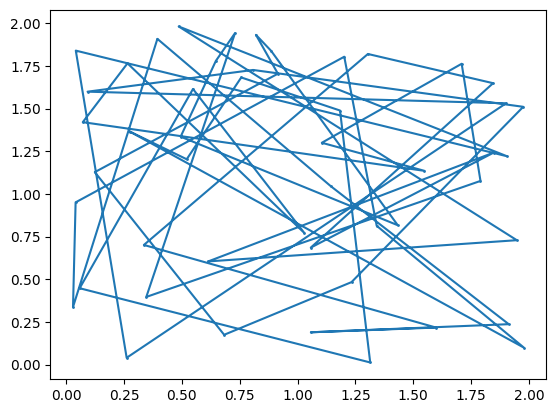

0.00000000894623203
Start distance: 54.81733746571559   Final distance: 16.685048894541545


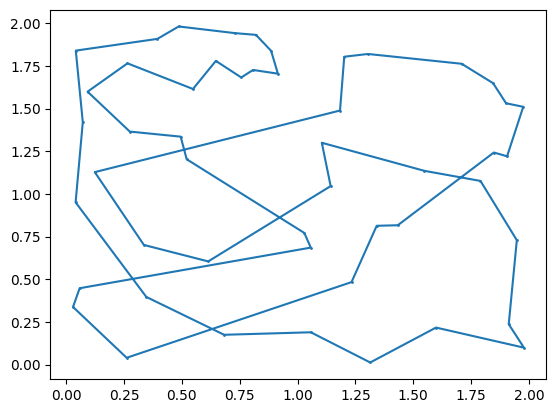

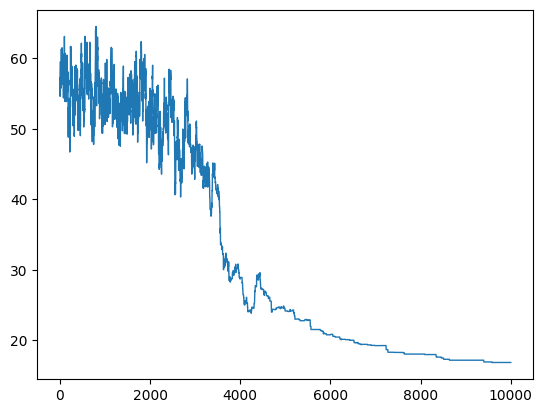

In [86]:
travelling_salesman(0, 2, 50, 1, swap_arbitrary, exp_temp, 20)

Przykład 2

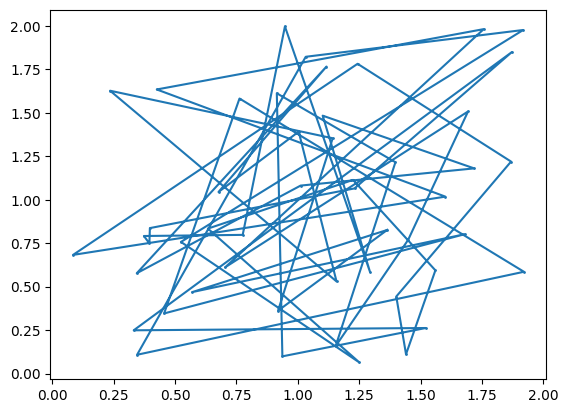

0.00238922857277603
Start distance: 51.72260612619396   Final distance: 32.24763377050952


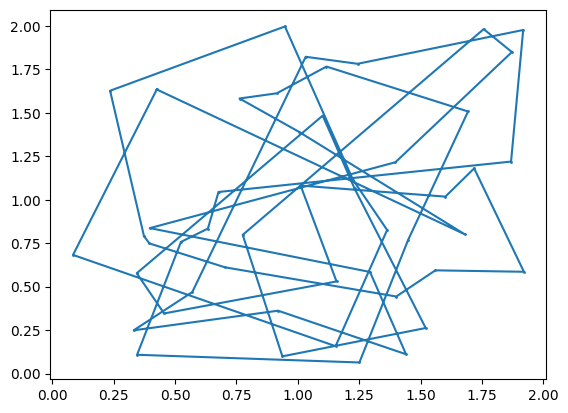

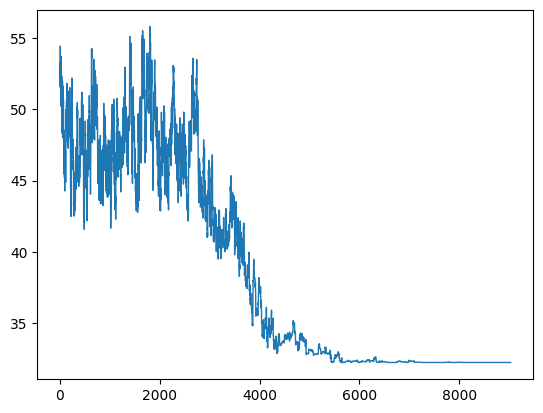

In [87]:
travelling_salesman(0, 2, 50, 1, swap_consecutive, exp_temp, 20)

### Zadanie 2

In [3]:
def showImg(n, matrix):
    fig, ax = plt.subplots(figsize=(n / INCH_TO_PIXEL + 5, n / INCH_TO_PIXEL + 5))
    plt.imshow(matrix, interpolation="nearest")
    plt.xticks([])
    plt.yticks([])
    plt.gray()
    plt.show()


In [49]:
# minimalizujemy całkowitą energię
def four_right_four_left(matrix, coord):
    row, col = coord
    n = len(matrix)
    return (
        (row, (col + 1) % n),
        (row, (col + 2) % n),
        (row, (col + 3) % n),
        (row, (col + 4) % n),
        (row, (col - 1)% n),
        (row, (col - 2)% n),
        (row, (col - 3)% n),
        (row, (col - 4)% n),
    )


def square(matrix, coord):
    row, col = coord
    n = len(matrix)
    return (
        ((row + 1) % n, (col + 1) % n),
        ((row) % n, (col + 1) % n),
        ((row - 1) % n, (col + 1) % n),
        ((row + 1) % n, (col) % n),
        ((row - 1) % n, (col) % n),
        ((row - 1) % n, (col - 1) % n),
        ((row) % n, (col - 1) % n),
        ((row + 1) % n, (col - 1) % n),
    )


def big_cross(matrix, coord):
    row, col = coord
    n = len(matrix)
    matrix1 = [((row + i) % n, col) for i in range(-2, 3) if i != 0]
    matrix2 = [(row, (col + i) % n) for i in range(-2, 3) if i != 0]
    return matrix1 + matrix2



def four_neigh(matrix, coord):
    r, c = coord
    n = len(matrix)
    return [
        ((r + 1) % n, c),
        (r, (c + 1) % n),
        ((r - 1) % n, c),
        (r, (c - 1) % n),
    ]


class Energy:
    def __init__(self, func=lambda x: x**2, field_getter=None):
        self.func = func
        self.field_getter = field_getter

    def compute_energy(self, matrix, x):
        return self.func(self.sum_active_neighbours(matrix, x))

    def get_neighbours(self, matrix, x):
        return self.field_getter(matrix, x)

    def sum_active_neighbours(self, matrix, x):
        suma = 0
        neigh = self.get_neighbours(matrix, x)
        for i in neigh:
            if matrix[i] == 0:
                suma += 1
        return suma

    def set_energy_func(self, func):
        self.func = func

    def set_field_getter(self, field_getter):
        self.field_getter = field_getter


class BinaryImage:
    def __init__(
        self,
        image: np.ndarray,
        energy_elem: Energy,
        temperature: float,
        max_iteration: int,
        alpha=0.999,
    ):
        self.image = np.copy(image)
        self.length = len(self.image)
        self.energy = energy_elem
        self.neighbour_matrix = None
        self.best_image = np.copy(image)
        self.temperature = temperature
        self.best_energy = None
        self.begin_energy = 0
        self.max_iteration = max_iteration
        self.plot_energy = []
        self.ALPHA = alpha

        self.iter = 1
        self.init_temp = self.temperature
        self.store_black = []

    # def compute_black(self):
    #     for x in range(self.length):
    #         for y in range(self.length):
    #             if self.image[x, y] == 1: self.store_black.append((x, y))

    # zwraca obliczoną energię dla zmienionych czarnych pól
    def compute_neighbour_matrix(self):
        neighbour = np.zeros((self.length, self.length))
        # self.compute_black()
        for x in range(self.length):
            for y in range(self.length):
                neighbour[x, y] = self.energy.sum_active_neighbours(self.image, (x, y))

        return neighbour

    def acceptance_probability(self, diff_cost):
        return np.e ** (-abs(diff_cost) / self.temperature)

    def begining_energy(self):
        self.neighbour_matrix = self.compute_neighbour_matrix()
        for x in range(self.length):
            for y in range(self.length):
                self.begin_energy += self.energy.func(self.neighbour_matrix[x, y])
                # print(self.begin_energy, self.neighbour_matrix[x, y])
        self.best_energy = self.begin_energy

    def solve_image(self):
        curr_energy = self.best_energy
        self.plot_energy.append(curr_energy)
        cos = 0
        iteration_counter = 0
        solution_counter = 0
        flag = 0
        # while iteration_counter < self.max_iteration:
        while self.iter < self.max_iteration:
            # chose 2 elements from matrix
            # time.sleep(0.5)
            x, y = (np.random.choice(self.length), np.random.choice(self.length)), (
                np.random.choice(self.length),
                np.random.choice(self.length),
            )
            # rand_num = np.random.choice(len(self.store_black))
            # x, y = (self.store_black[rand_num]), (np.random.choice(self.length), np.random.choice(self.length))

            diff_cost = self.calculate_diff(x, y)
            rand_val = np.random.random()

            if diff_cost > 0:
                # self.swap_matrix_elems(x, y)
                curr_energy -= diff_cost

                flag = 1
                # iteration_counter = 0
            if rand_val < self.acceptance_probability(diff_cost):
                # self.swap_matrix_elems(x, y)
                flag = 1
                curr_energy -= diff_cost
                iteration_counter = 0
            else:
                iteration_counter += 1
            if flag:
                self.swap_matrix_elems(x, y)
                flag = 0
            # else:
                # if rand_val < self.acceptance_probability(diff_cost):
                #     self.swap_matrix_elems(x, y)
                #     curr_energy -= diff_cost
                #     iteration_counter = 0
                # else:
                #     iteration_counter += 1

            if self.best_energy > curr_energy:
                self.best_energy = curr_energy
                self.best_image = np.copy(self.image)
            self.iter += 1
            self.plot_energy.append(curr_energy)
            self.temperature = self.temperature * self.ALPHA
            # self.temperature = self.init_temp / (self.iter)
            print(
                "{:.16f} {}".format(self.temperature, curr_energy, diff_cost),
                end="\r",
            )
            # print("{:.16f}".format(iteration_counter), end="\r")

    def calculate_diff(self, x, y):
        # x - current position
        # y - future position
        if self.image[x] == self.image[y]:
            return 0

        fields1 = self.energy.get_neighbours(self.image, x)
        fields2 = self.energy.get_neighbours(self.image, y)

        fields = set(fields1 + fields2)
        fields1 = list(fields.difference(fields2))
        fields2 = list(fields.difference(fields1))

        result = 0
        # print("field1 and field2 {}".format(fields1 + fields2))

        for field in fields1 + fields2:
            # print("field {}".format(field))
            result += self.energy.func(self.neighbour_matrix[field])

        change_val = 1 if self.image[x] == 0 else -1
        # change_val = -1 if self.image[x] == 0 else 1

        after_change_result = 0
        for field in fields1:
            after_change_result += self.energy.func(
                self.neighbour_matrix[field] + change_val
            )
        for field in fields2:
            after_change_result += self.energy.func(
                self.neighbour_matrix[field] - change_val
            )

        # checking if x or y was in neighbours of each other
        if y in fields1:
            result += self.energy.func(self.neighbour_matrix[x]) + self.energy.func(
                self.neighbour_matrix[y]
            )
            after_change_result += self.energy.func(
                self.neighbour_matrix[x] + change_val
            ) + self.energy.func(self.neighbour_matrix[y] - change_val)

        return result - after_change_result

    def swap_matrix_elems(self, x, y):
        if self.image[x] == self.image[y]:
            return

        fields1 = self.energy.get_neighbours(self.image, x)
        fields2 = self.energy.get_neighbours(self.image, y)

        change_val = 1 if self.image[x] == 0 else -1

        for field in fields1:
            self.neighbour_matrix[field] += change_val
        for field in fields2:
            self.neighbour_matrix[field] -= change_val

        self.image[x], self.image[y] = self.image[y], self.image[x]
        # self.store_black.remove(x)
        # self.store_black.append(y)

    def draw(self, matrix):
        fig, ax = plt.subplots(
            figsize=(self.length / INCH_TO_PIXEL + 5, self.length / INCH_TO_PIXEL + 5)
        )
        plt.imshow(matrix, interpolation="nearest")
        plt.xticks([])
        plt.yticks([])
        plt.gray()
        plt.show()

    def draw_energy(self):
        show_energy(self.plot_energy, False)


In [5]:
def generate_binary_image(n=516, p=0.5):
    matrix1D = np.zeros((n*n))

    amount_of_points = round(n*n*(1-p))
    
    matrix1D[:amount_of_points] += 1
    np.random.shuffle(matrix1D)

    matrix2D = np.reshape(matrix1D, (n,n))

    return matrix2D

In [50]:
def calculate_image(n, p, field_getter, max_iteration, temp, alpha, energy_func = None):
    matrix_01 = generate_binary_image(n, p=p)
    energy_01 = Energy(field_getter=field_getter)
    if energy_func != None:
        energy_01.set_energy_func = energy_func
    image = BinaryImage(matrix_01, energy_01, temp, max_iteration, alpha)
    image.begining_energy()
    image.draw( image.image)
    
    image.solve_image()
    print(
        "Begin energy: {}     End energy: {}".format(
            image.begin_energy, image.best_energy
        )
    )

    
    image.draw(image.best_image)
    image.draw_energy()


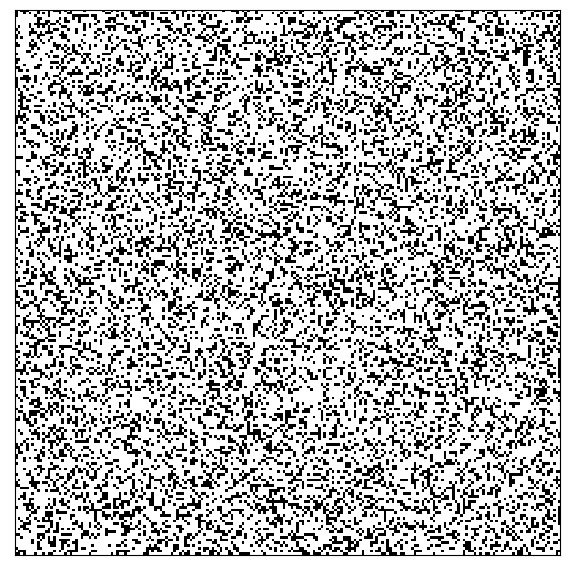

Begin energy: 299044.0     End energy: 280906.0


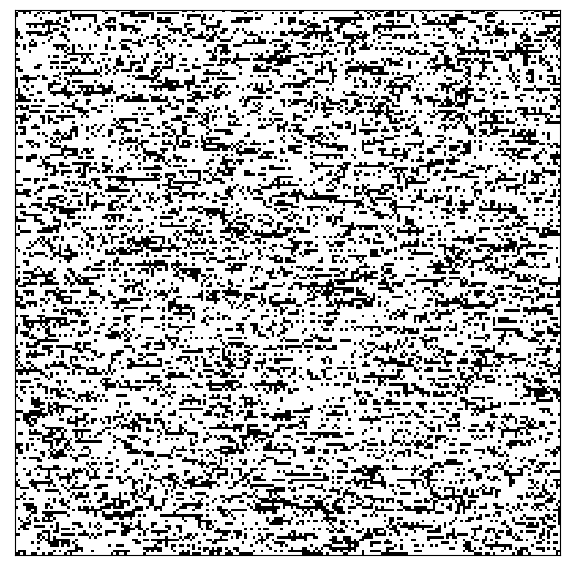

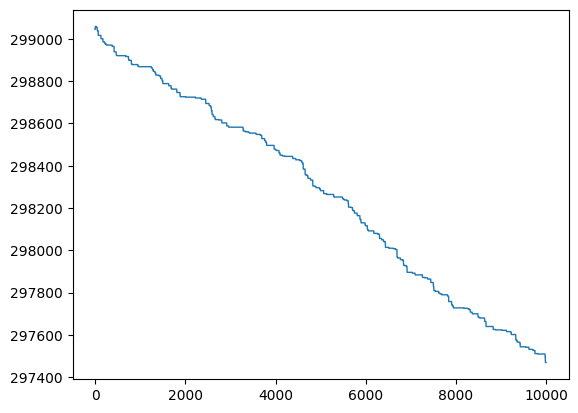

In [31]:
calculate_image(200, 0.3, four_right_four_left, 10**6, 20, 0.999)

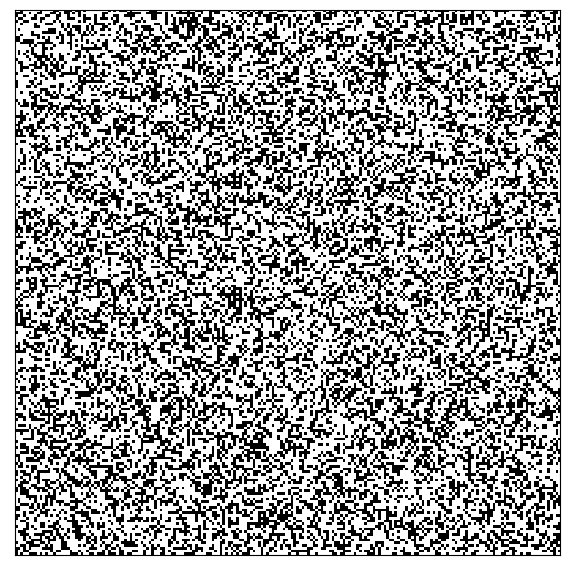

Begin energy: 487498.0     End energy: 473804.0


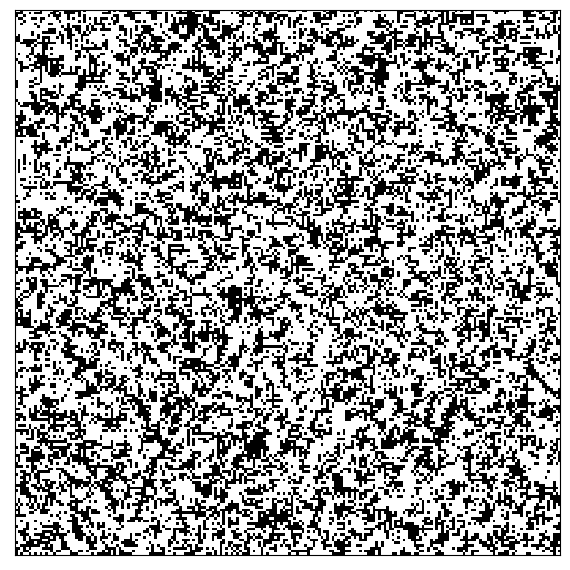

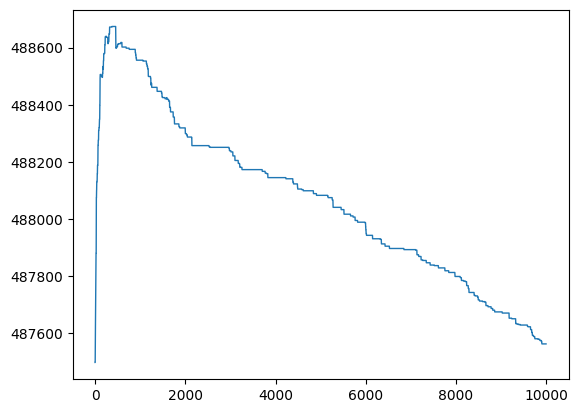

In [29]:
calculate_image(200, 0.4, square, 10**6, 2000, 0.999)


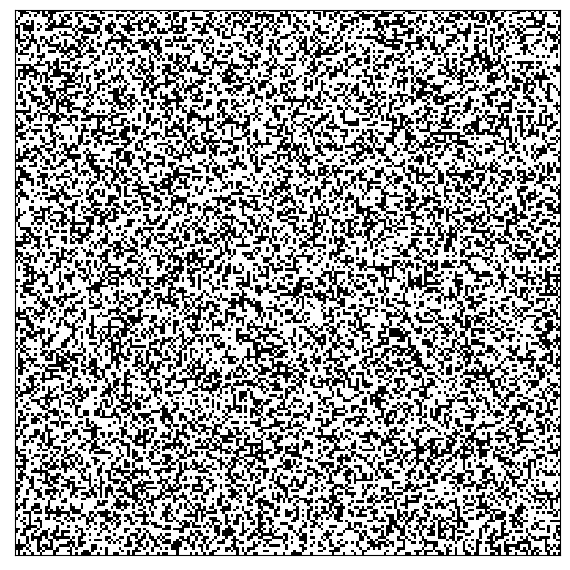

Begin energy: 486308.0     End energy: 351240.0


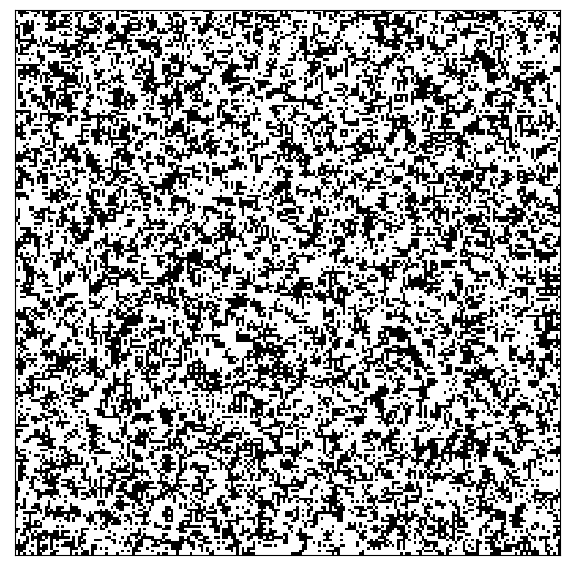

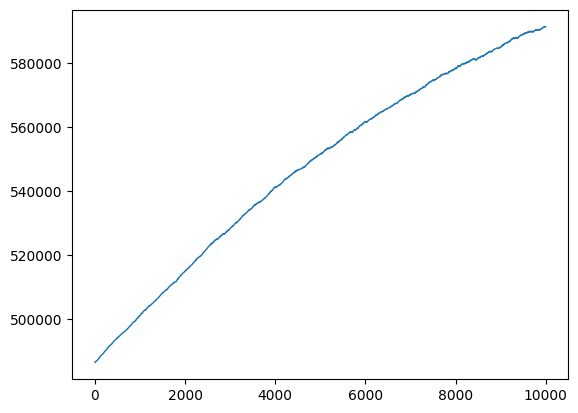

In [41]:
calculate_image(200, 0.4, square, 10**6, 2000, 0.9999)


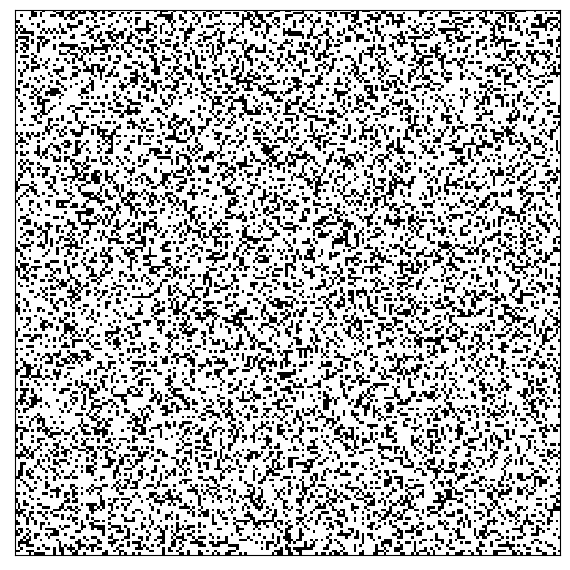

Begin energy: 297606.0     End energy: 209246.0


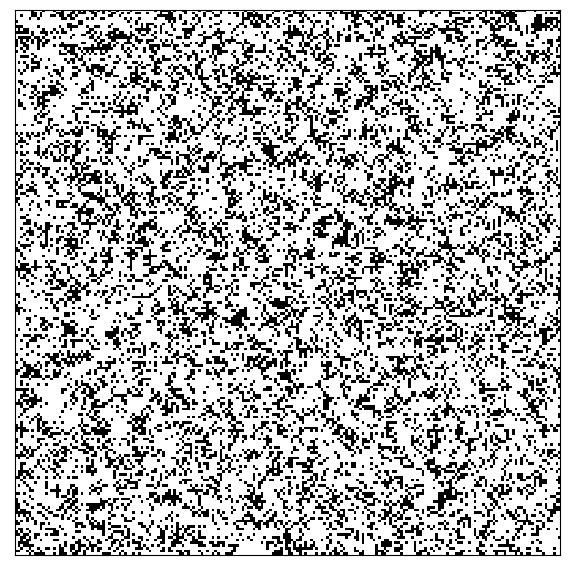

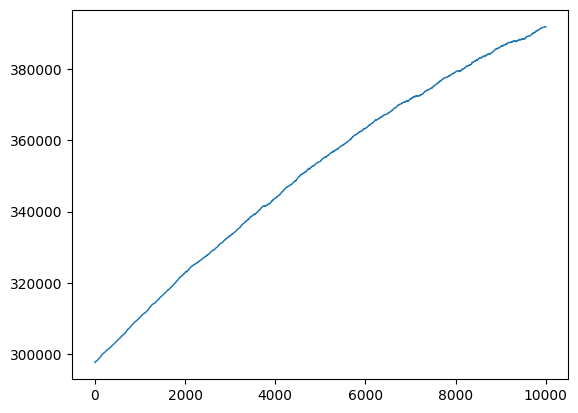

In [40]:
calculate_image(200, 0.3, big_cross, 10**6, 2000, 0.9999)


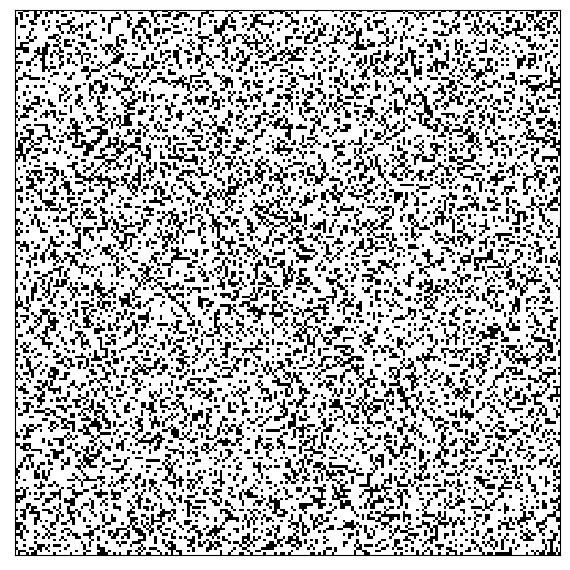

Begin energy: 91958.0     End energy: 15457.0


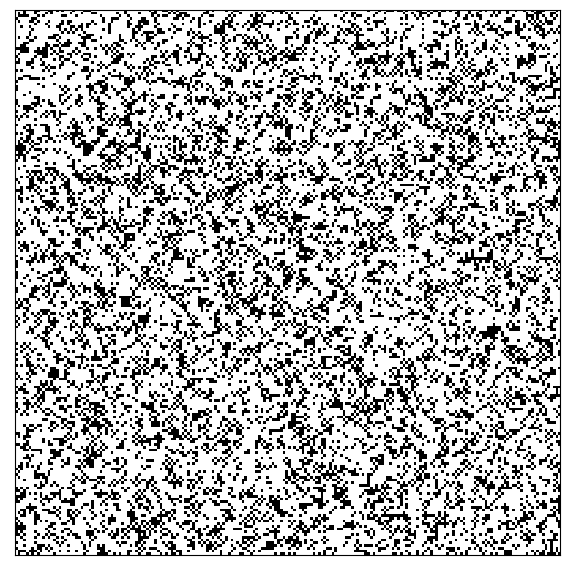

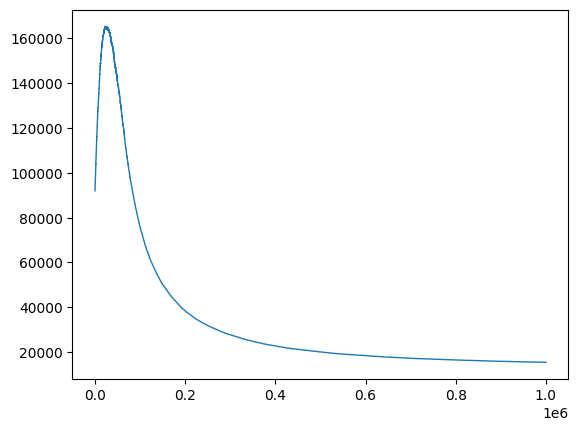

In [46]:
calculate_image(200, 0.3, four_neigh, 10**6, 5000, 0.9999)


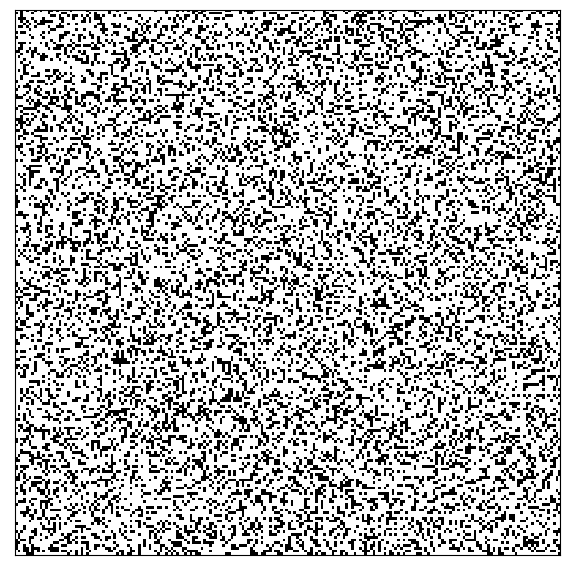

Begin energy: 297366.0     End energy: 164140.0


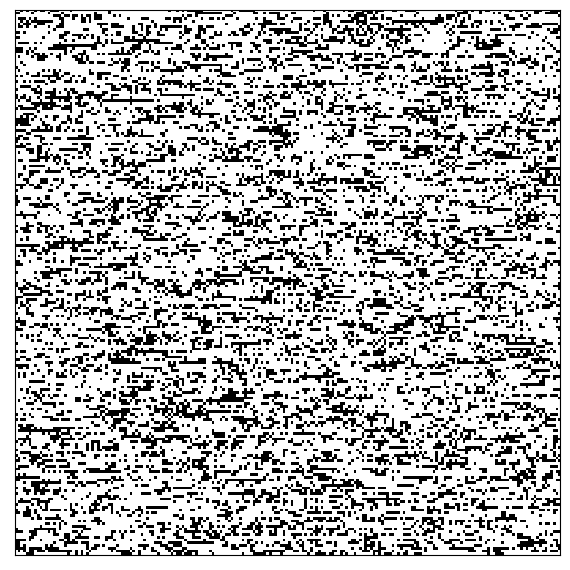

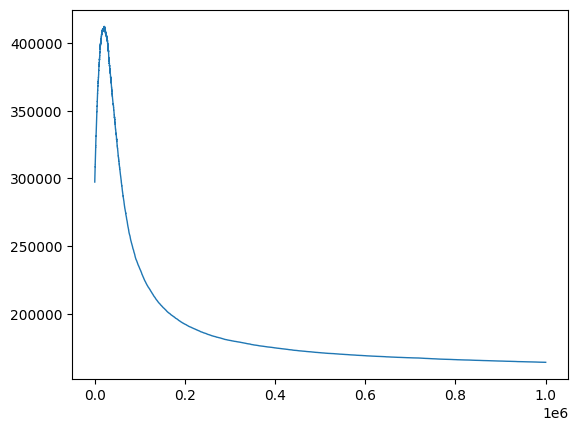

In [47]:
calculate_image(
    n=200,
    p=0.3,
    field_getter=four_right_four_left,
    max_iteration=10**6,
    temp=2000,
    alpha=0.9999,
)


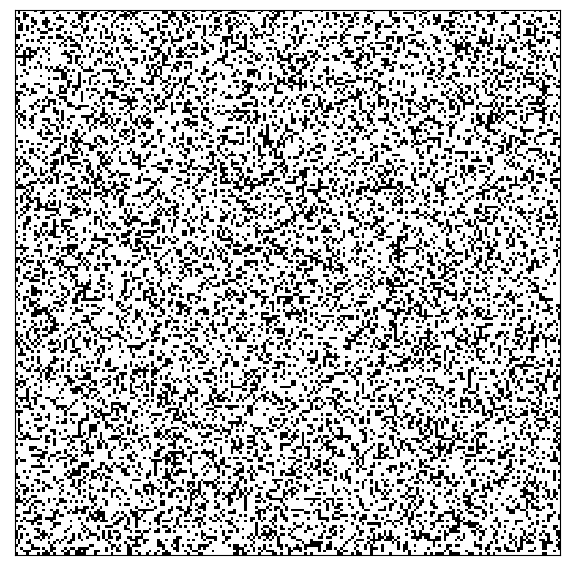

Begin energy: 296160.0     End energy: 65650.0


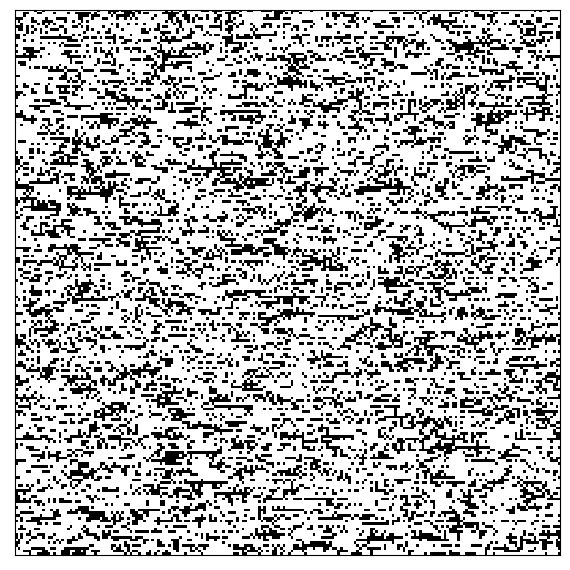

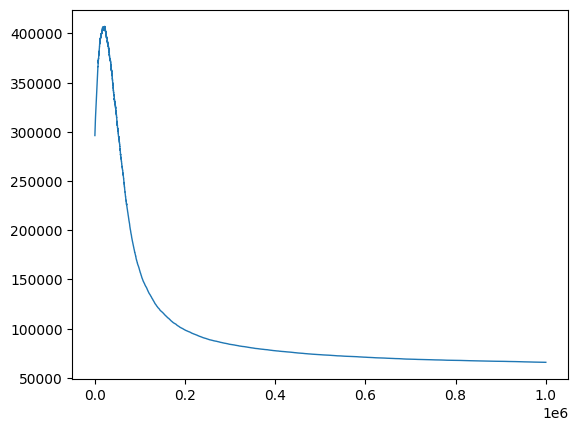

In [48]:
calculate_image(
    n=200,
    p=0.3,
    field_getter=four_right_four_left,
    max_iteration=10**6,
    temp=10000,
    alpha=0.9999,
)

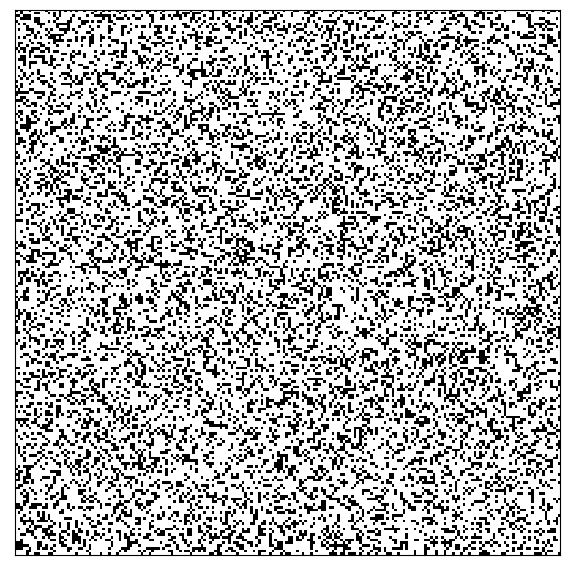

Begin energy: 297476.0     End energy: 210001.0


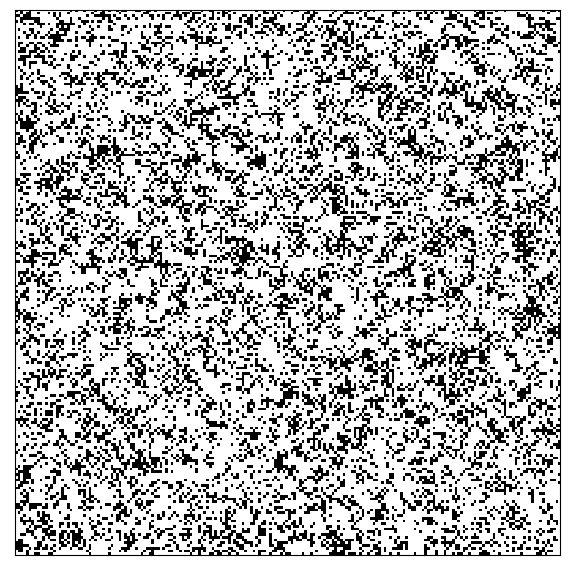

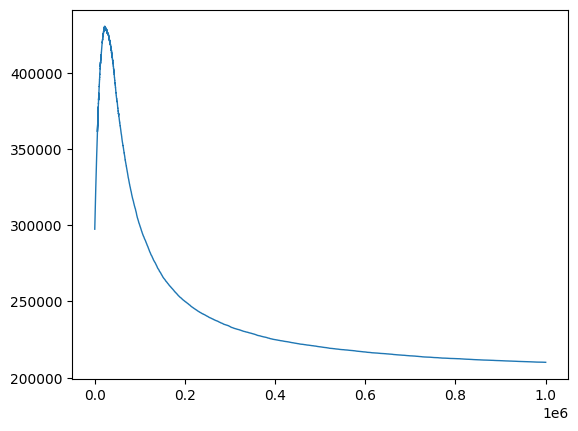

In [52]:
calculate_image(
    n=200,
    p=0.3,
    field_getter=big_cross,
    max_iteration=10**6,
    temp=2000,
    alpha=0.9999,
    energy_func=lambda x: np.e**x
)


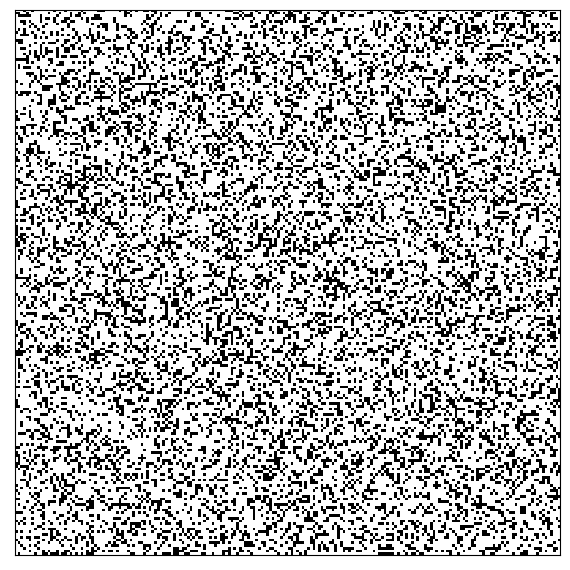

Begin energy: 297288.0     End energy: 208214.0


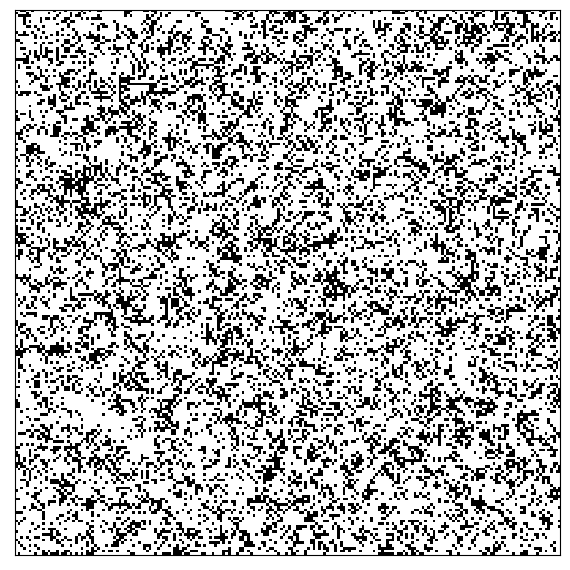

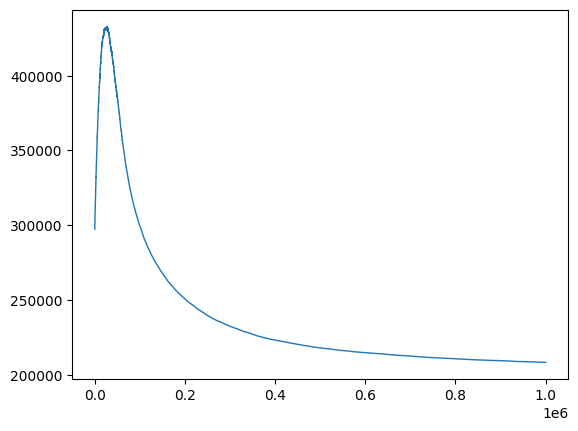

In [53]:
calculate_image(
    n=200,
    p=0.3,
    field_getter=big_cross,
    max_iteration=10**6,
    temp=2000,
    alpha=0.9999,
    energy_func=lambda x: (5*x)**2
)

## Wykonanie poleceń z zadania 2

Obrazy binarne zostały wygenerowane dla n = 100, 200, 500 oraz gęstości p = 0.1, 0.3, 0.4</br>
Typy sąsiedźtwa:
- ```four_right_four_left``` -> 8 sąsiadów, cztery po prawej stronie i po lewej wskazywanego elementu
- ```square``` -> 8-sąsiadów, element otoczony z wszystkich stron
- ```big_cross``` -> 8-sąsiadów, 2 na górze i dole oraz po lewej i po prawej stronie elementu
- ```four_neigh``` -> 4-sąsiadów, otoczony element z każdej strony

Podstawowa funkcja energii to $y = x^2$

Testowanie wyników, dla różnego rozmiaru tablicy:

rozmiary: 100 x 100 </br>
sąsiedźtwo: ```four_right_four_left```</br>
gęstość: 0.1</br>
temperatura:2000</br>
alpha: 0.9999</br>

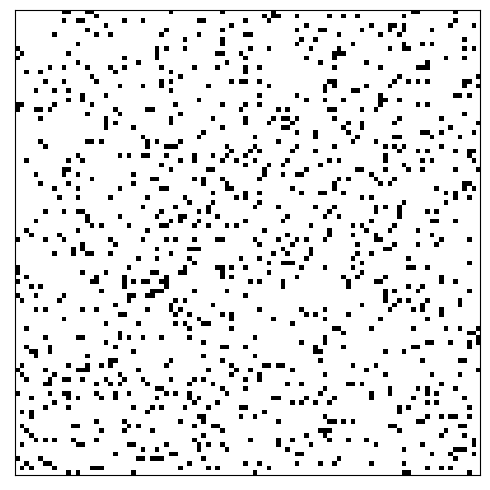

Begin energy: 13648.0     End energy: -48921.0


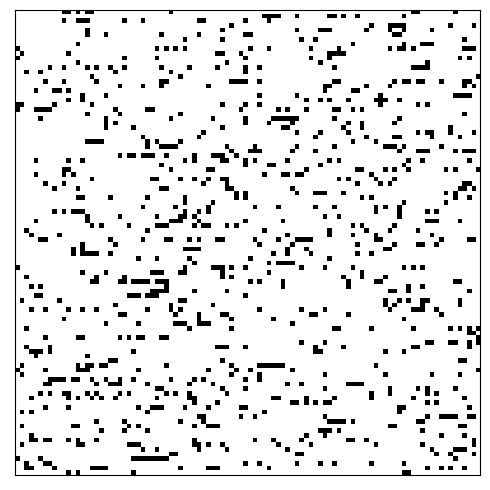

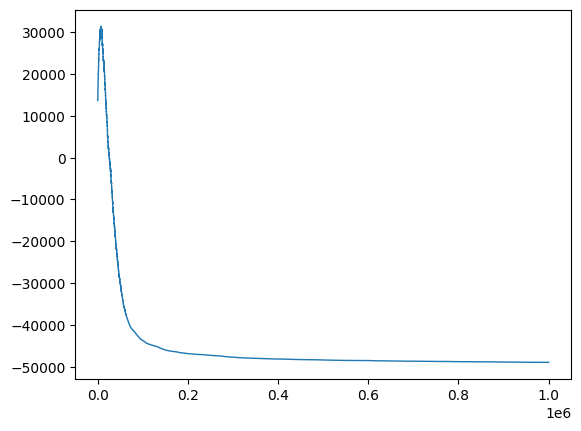

In [60]:
calculate_image(
    n=100,
    p=0.1,
    field_getter=four_right_four_left,
    max_iteration=10**6,
    temp=2000,
    alpha=0.9999,
)

rozmiary: 200 x 200 </br>
sąsiedźtwo: ```four_right_four_left```</br>
gęstość: 0.1</br>
temperatura:2000</br>
alpha: 0.9999</br>

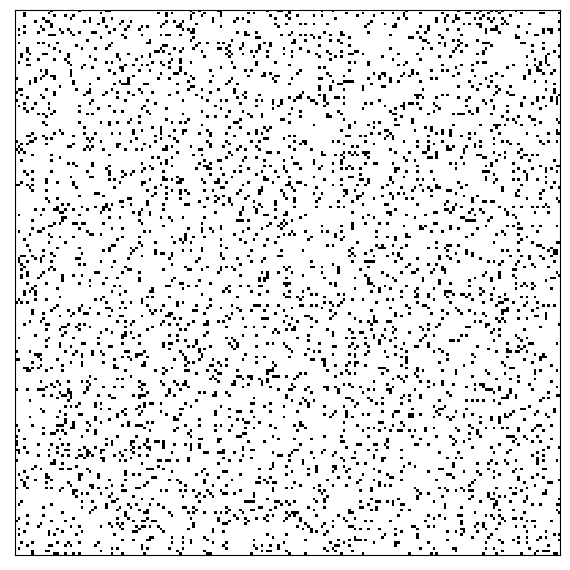

Begin energy: 54264.0     End energy: 30114.0


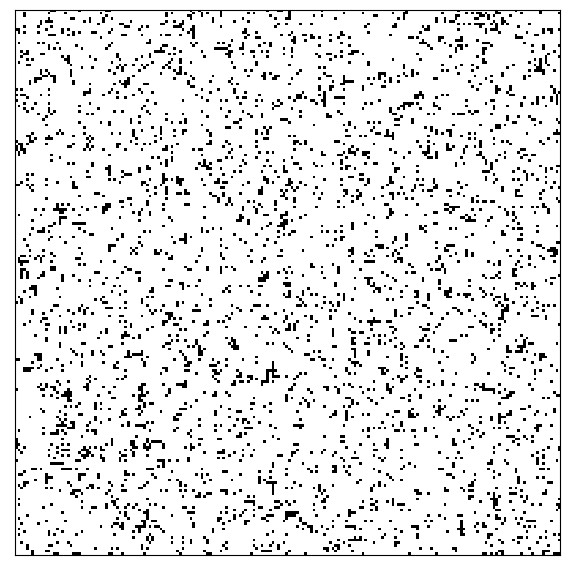

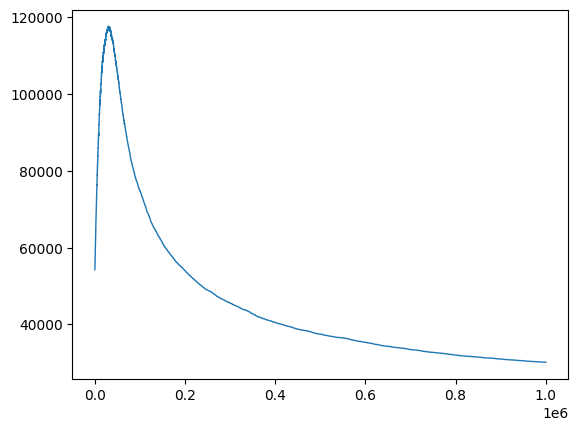

In [59]:
calculate_image(
    n=200,
    p=0.1,
    field_getter=four_right_four_left,
    max_iteration=10**6,
    temp=2000,
    alpha=0.9999,
)

rozmiary: 500 x 500 </br>
sąsiedźtwo: ```four_right_four_left```</br>
gęstość: 0.1</br>
temperatura:2000</br>
alpha: 0.9999</br>

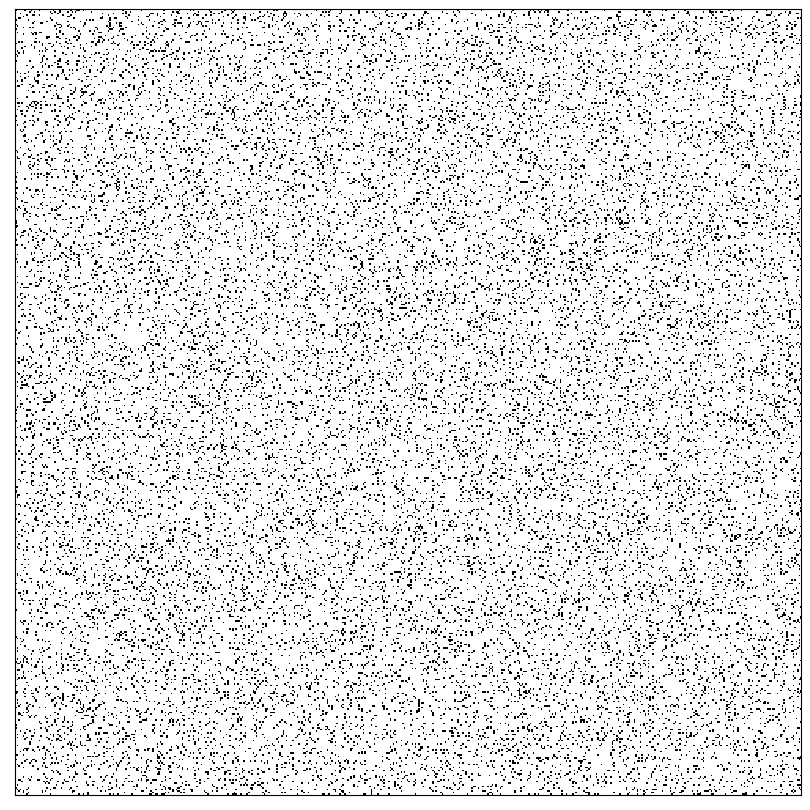

Begin energy: 338864.0     End energy: 338864.0


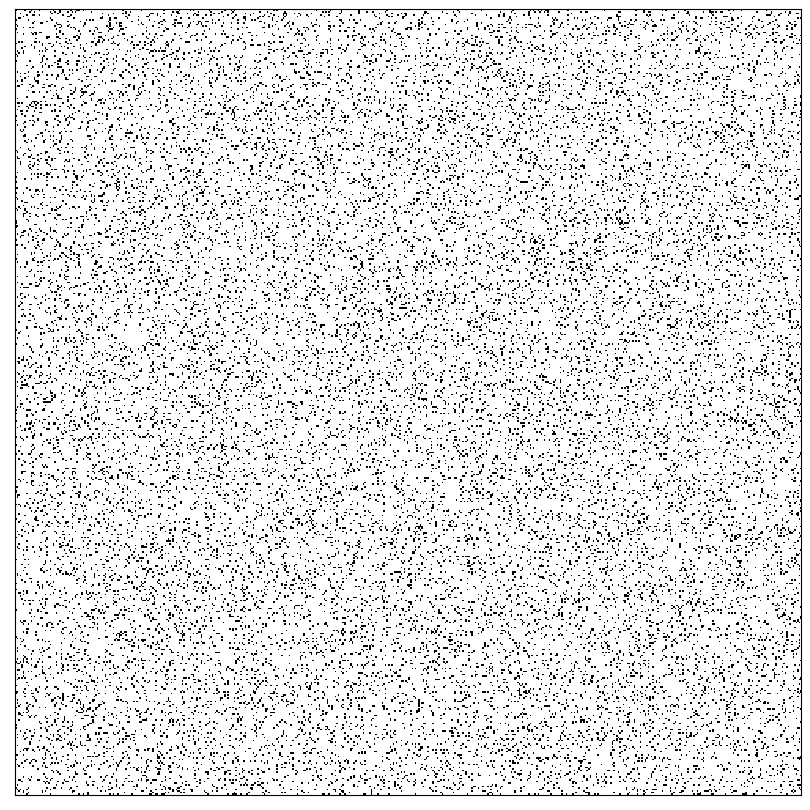

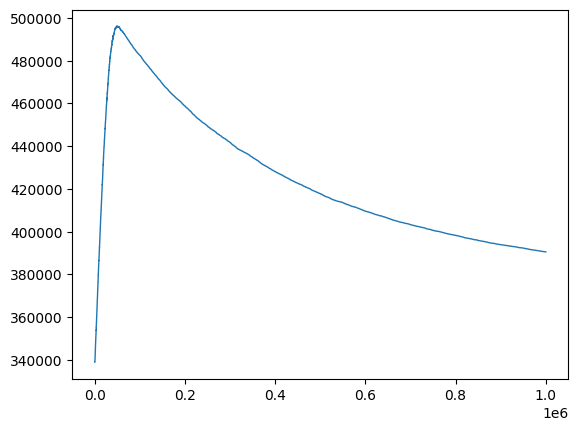

In [61]:
calculate_image(
    n=500,
    p=0.1,
    field_getter=four_right_four_left,
    max_iteration=10**6,
    temp=2000,
    alpha=0.9999,
)

Testowanie dla różnej gęstości

rozmiary: 200 x 200 </br>
sąsiedźtwo: ```four_right_four_left```</br>
gęstość: 0.1</br>
temperatura:2000</br>
alpha: 0.9999</br>

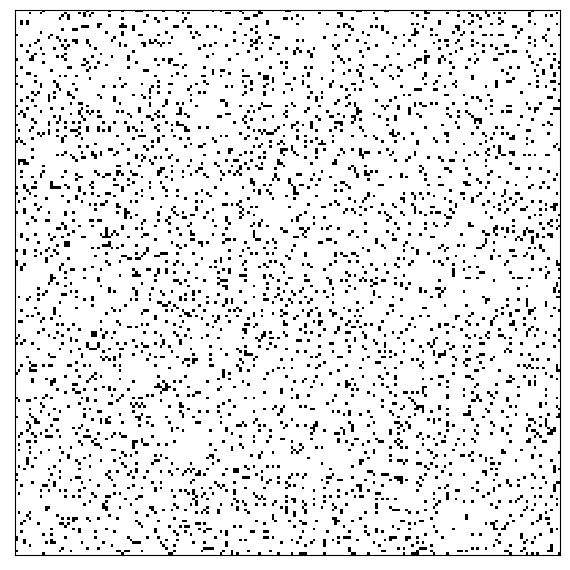

Begin energy: 54698.0     End energy: 23582.0


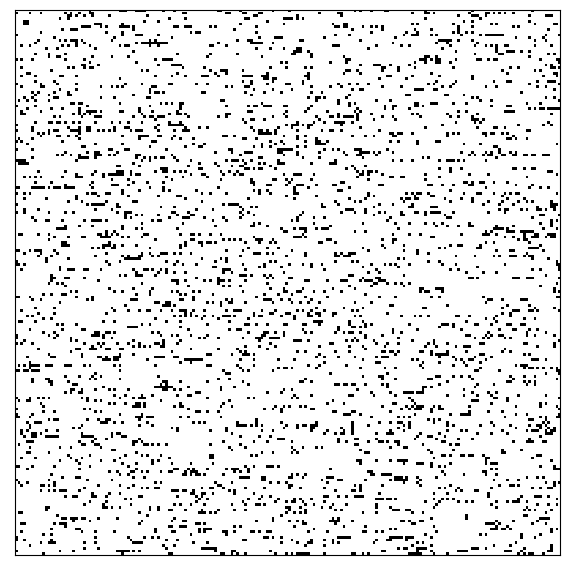

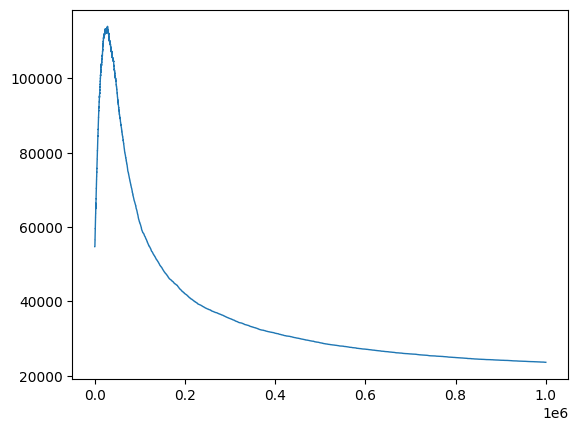

In [62]:
calculate_image(
    n=200,
    p=0.1,
    field_getter=four_right_four_left,
    max_iteration=10**6,
    temp=2000,
    alpha=0.9999,
)

rozmiary: 200 x 200 </br>
sąsiedźtwo: ```four_right_four_left```</br>
gęstość: 0.3</br>
temperatura:2000</br>
alpha: 0.9999</br>

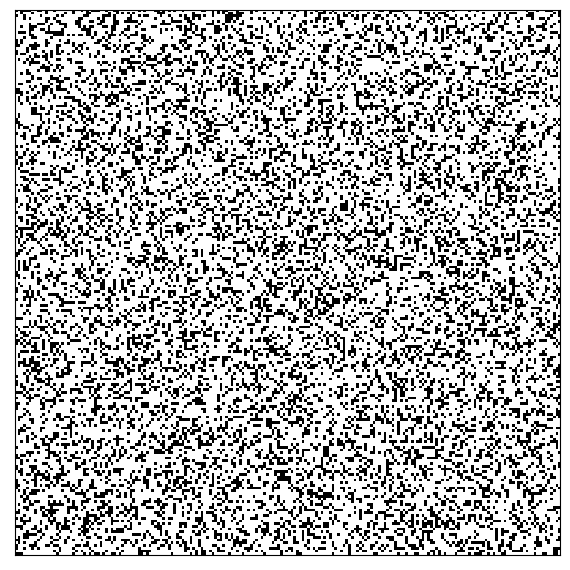

Begin energy: 297108.0     End energy: 166637.0


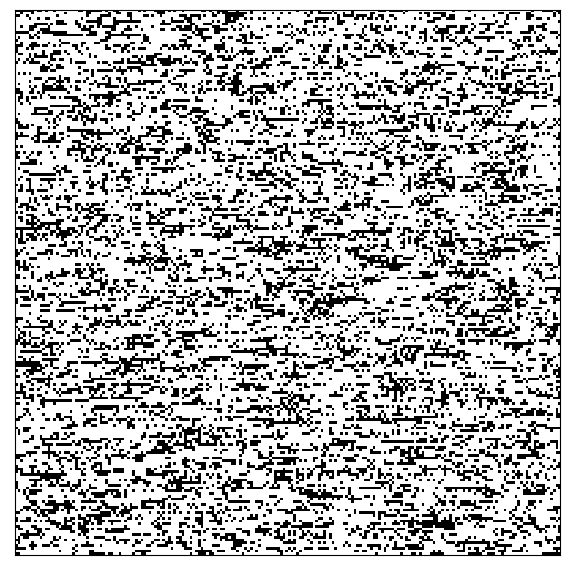

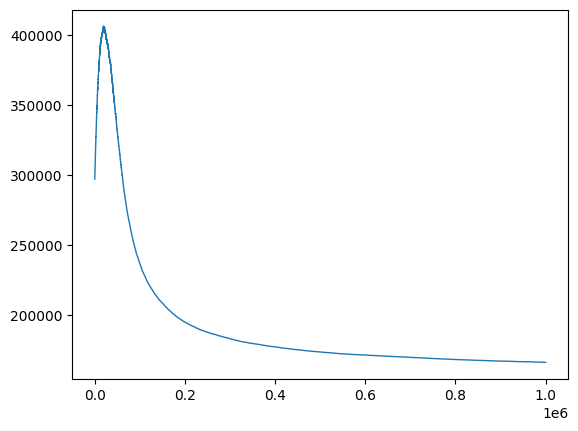

In [63]:
calculate_image(
    n=200,
    p=0.3,
    field_getter=four_right_four_left,
    max_iteration=10**6,
    temp=2000,
    alpha=0.9999,
)

rozmiary: 200 x 200 </br>
sąsiedźtwo: ```four_right_four_left```</br>
gęstość: 0.4</br>
temperatura:2000</br>
alpha: 0.9999</br>

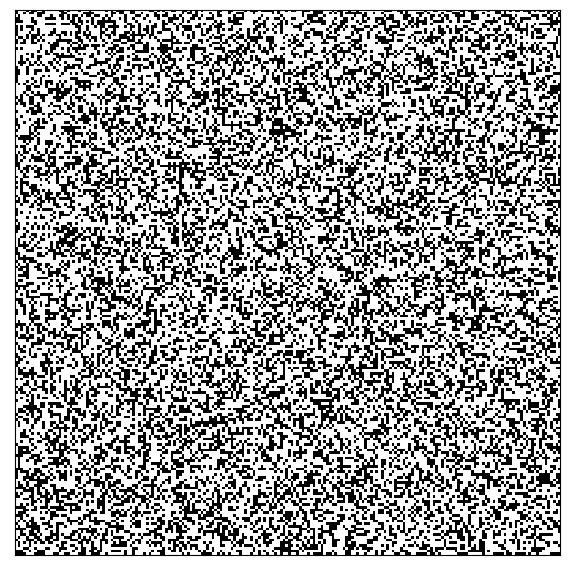

Begin energy: 487062.0     End energy: 317177.0


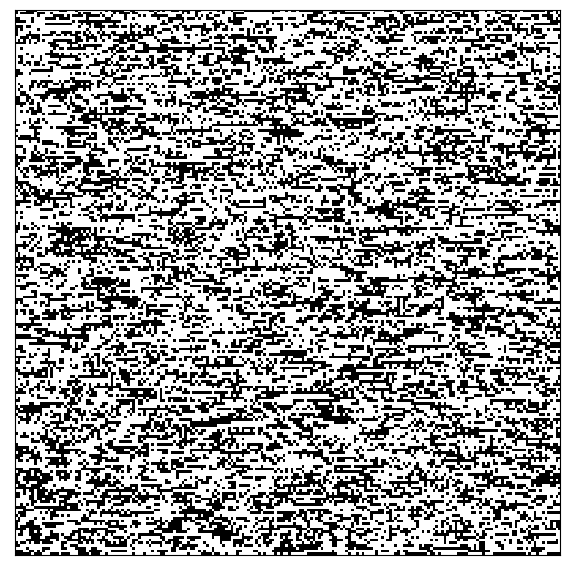

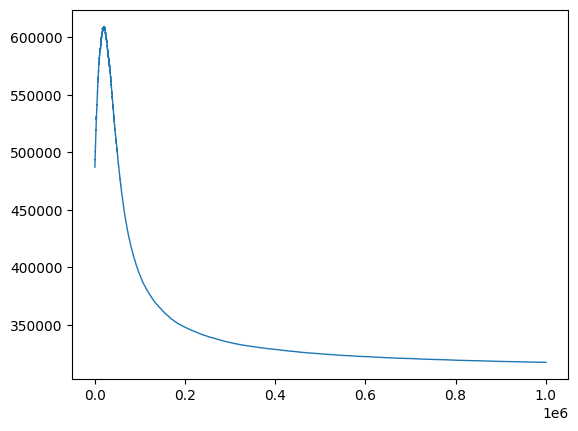

In [64]:
calculate_image(
    n=200,
    p=0.4,
    field_getter=four_right_four_left,
    max_iteration=10**6,
    temp=2000,
    alpha=0.9999,
)

Testowanie dla różnych typów sąsiedźtwa

rozmiary: 200 x 200 </br>
sąsiedźtwo: ```four_right_four_left```</br>
gęstość: 0.4</br>
temperatura:2000</br>
alpha: 0.9999</br>

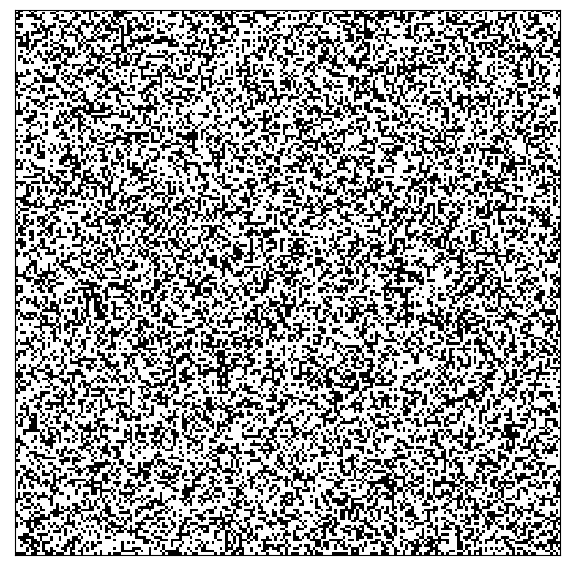

Begin energy: 487448.0     End energy: 320940.0


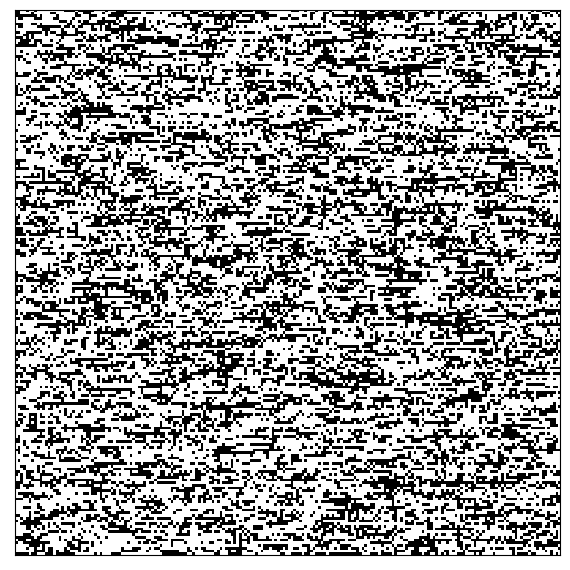

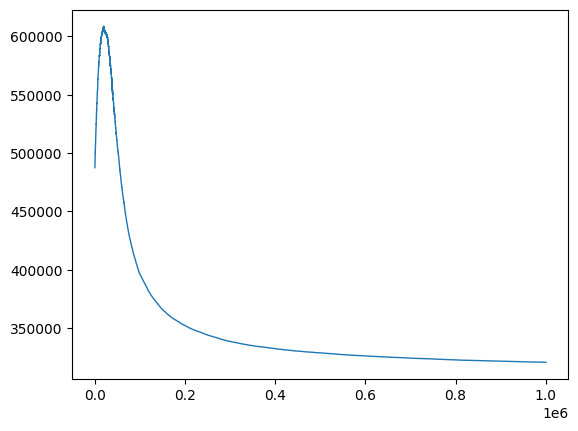

In [65]:
calculate_image(
    n=200,
    p=0.4,
    field_getter=four_right_four_left,
    max_iteration=10**6,
    temp=2000,
    alpha=0.9999,
)

rozmiary: 200 x 200 </br>
sąsiedźtwo: ```square```</br>
gęstość: 0.4</br>
temperatura:2000</br>
alpha: 0.9999</br>

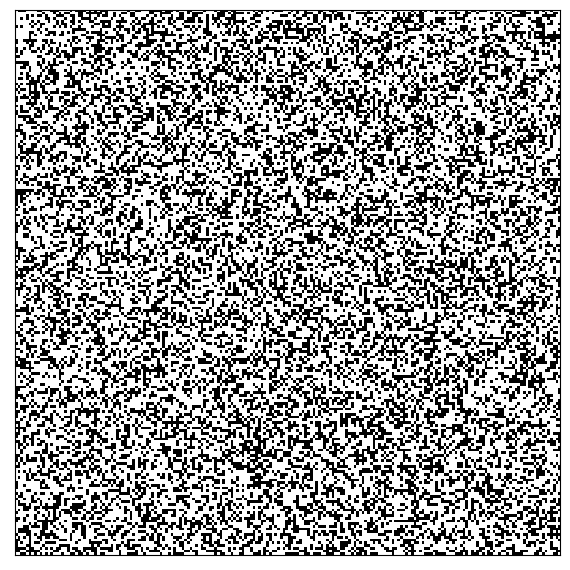

Begin energy: 486078.0     End energy: 352552.0


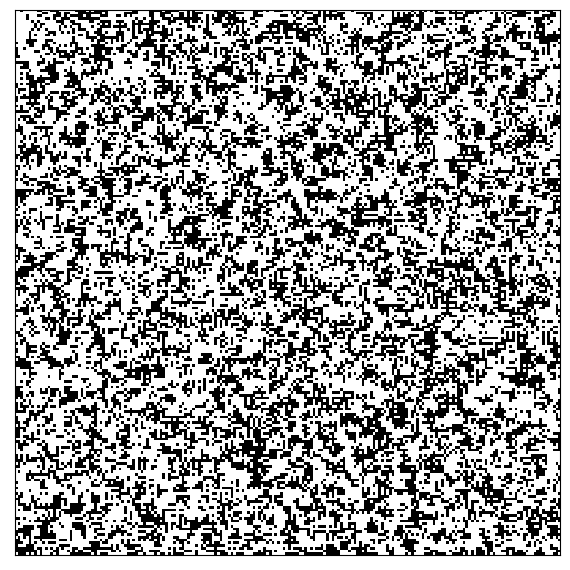

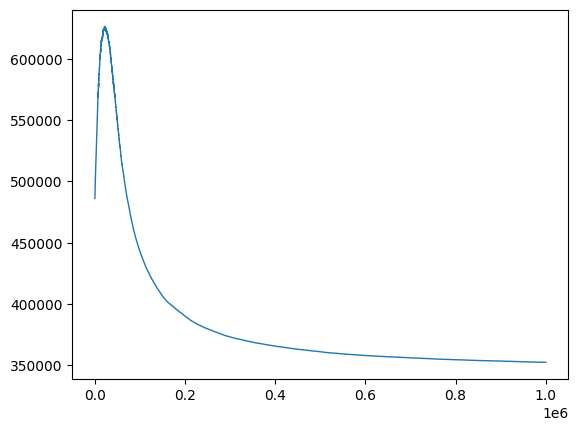

In [66]:
calculate_image(
    n=200,
    p=0.4,
    field_getter=square,
    max_iteration=10**6,
    temp=2000,
    alpha=0.9999,
)

rozmiary: 200 x 200 </br>
sąsiedźtwo: ```big_cross```</br>
gęstość: 0.4</br>
temperatura:2000</br>
alpha: 0.9999</br>

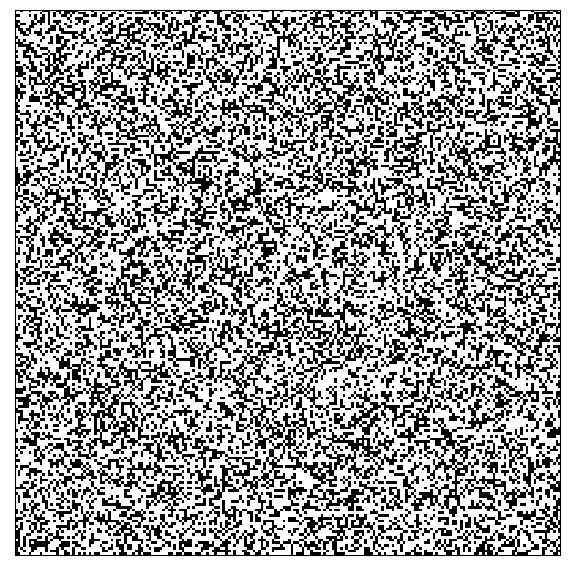

Begin energy: 486532.0     End energy: 373670.0


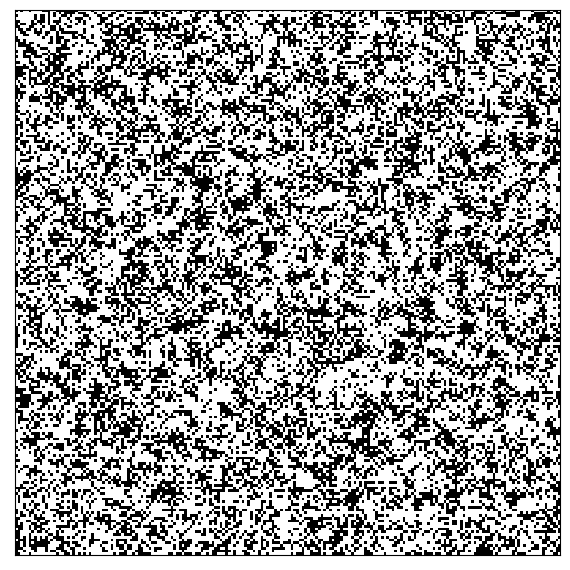

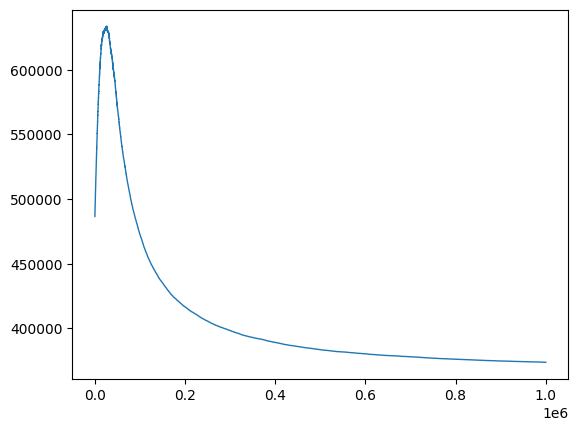

In [67]:
calculate_image(
    n=200,
    p=0.4,
    field_getter=big_cross,
    max_iteration=10**6,
    temp=2000,
    alpha=0.9999,
)

rozmiary: 200 x 200 </br>
sąsiedźtwo: ```four_neigh```</br>
gęstość: 0.4</br>
temperatura:2000</br>
alpha: 0.9999</br>

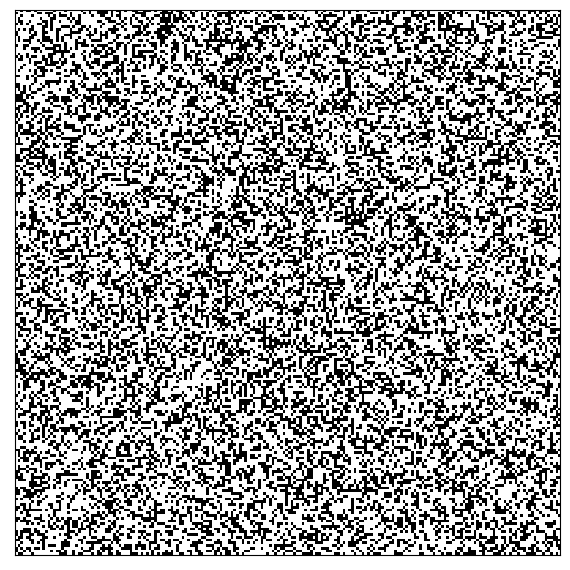

Begin energy: 141082.0     End energy: 72496.0


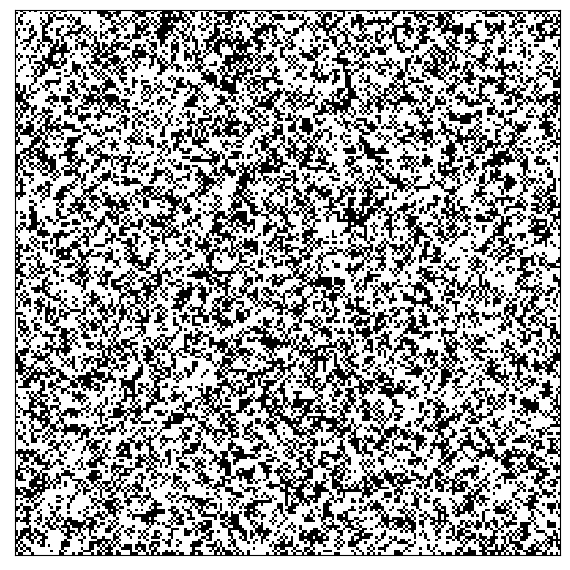

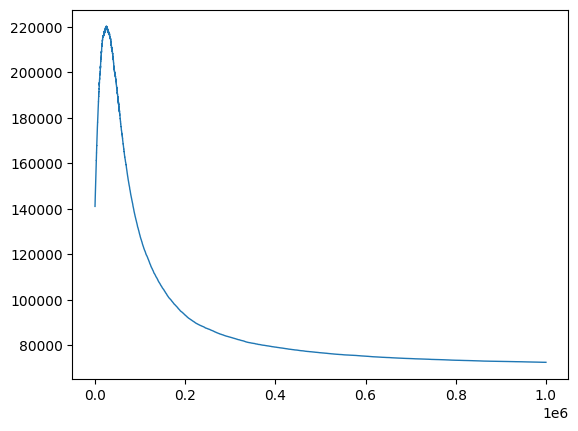

In [68]:
calculate_image(
    n=200,
    p=0.4,
    field_getter=four_neigh,
    max_iteration=10**6,
    temp=2000,
    alpha=0.9999,
)

Testowanie dla różnych temperatur początkowych -> 100, 500, 1000, 2000

rozmiary: 200 x 200 </br>
sąsiedźtwo: ```four_neigh```</br>
gęstość: 0.4</br>
temperatura:100</br>
alpha: 0.9999</br>

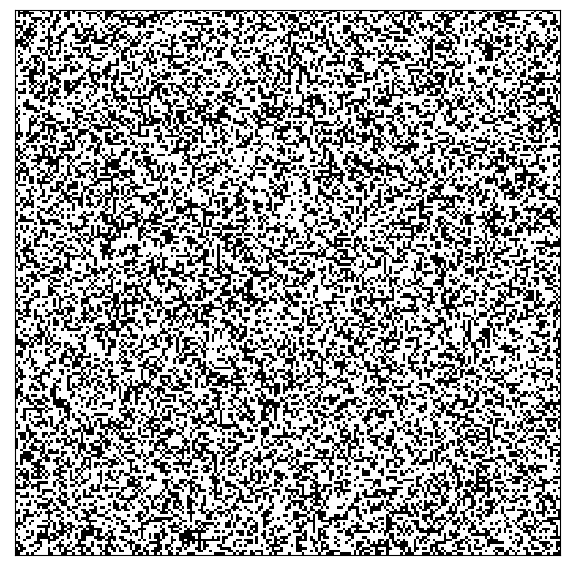

Begin energy: 140958.0     End energy: 131036.0


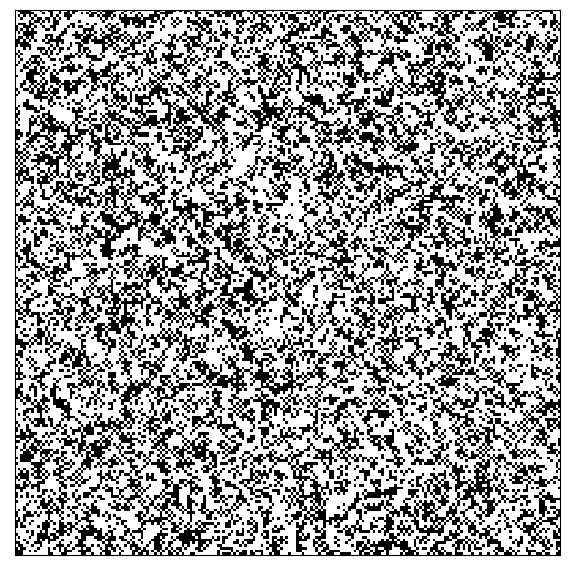

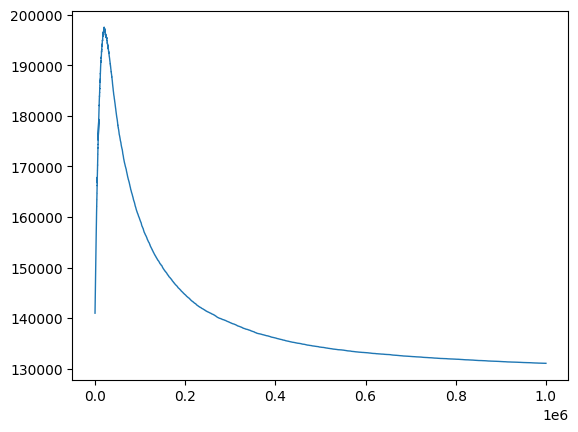

In [69]:
calculate_image(
    n=200,
    p=0.4,
    field_getter=four_neigh,
    max_iteration=10**6,
    temp=100,
    alpha=0.9999,
)

rozmiary: 200 x 200 </br>
sąsiedźtwo: ```four_neigh```</br>
gęstość: 0.4</br>
temperatura:500</br>
alpha: 0.9999</br>

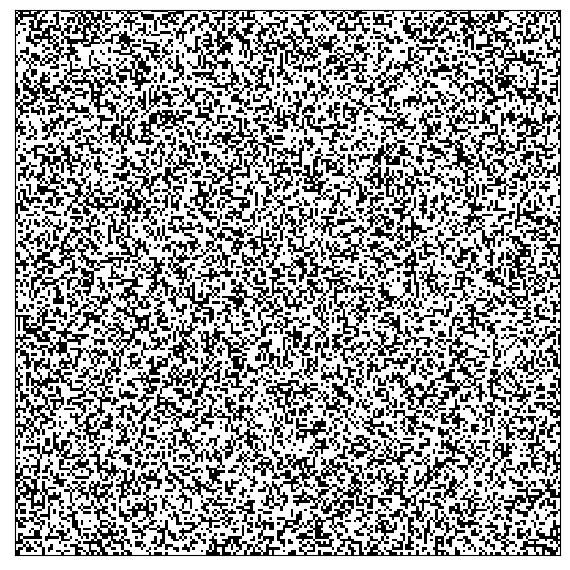

Begin energy: 139998.0     End energy: 104816.0


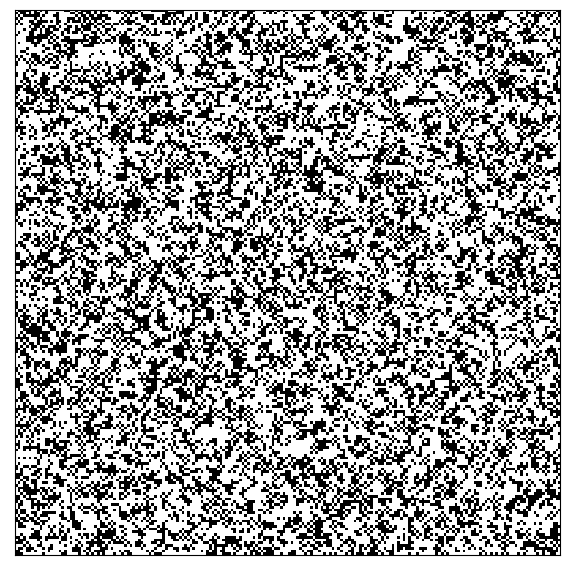

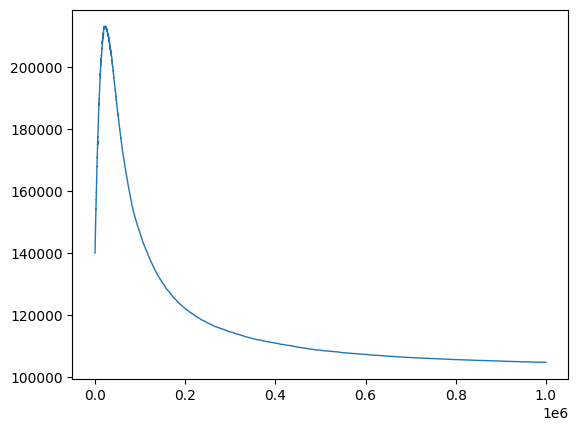

In [71]:
calculate_image(
    n=200,
    p=0.4,
    field_getter=four_neigh,
    max_iteration=10**6,
    temp=500,
    alpha=0.9999,
)

rozmiary: 200 x 200 </br>
sąsiedźtwo: ```four_neigh```</br>
gęstość: 0.4</br>
temperatura:1000</br>
alpha: 0.9999</br>

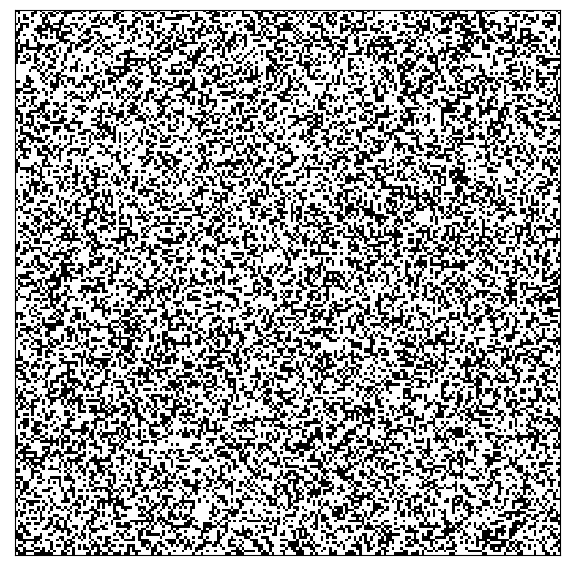

Begin energy: 141212.0     End energy: 90509.0


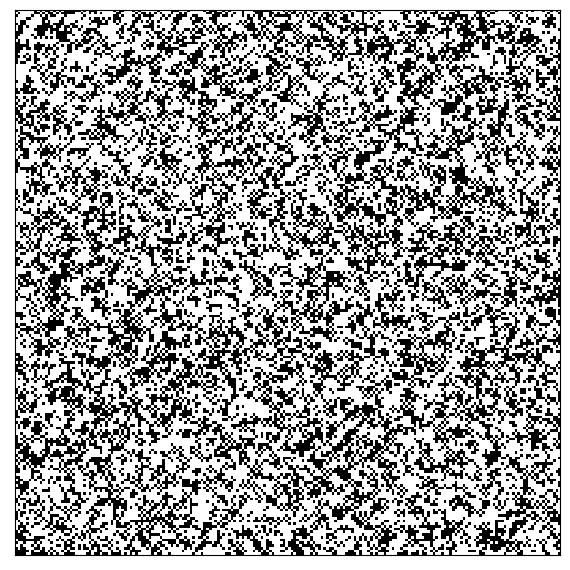

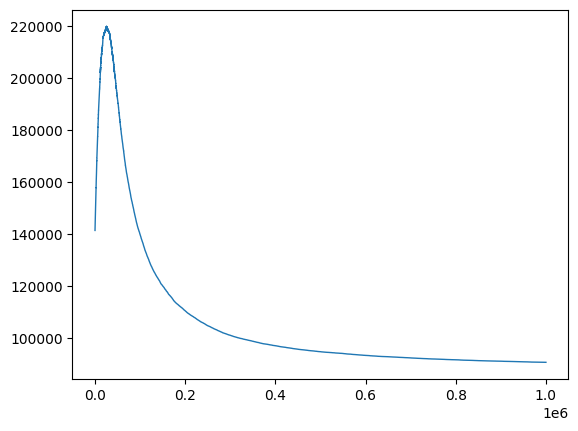

In [70]:
calculate_image(
    n=200,
    p=0.4,
    field_getter=four_neigh,
    max_iteration=10**6,
    temp=1000,
    alpha=0.9999,
)

rozmiary: 200 x 200 </br>
sąsiedźtwo: ```four_neigh```</br>
gęstość: 0.4</br>
temperatura:2000</br>
alpha: 0.9999</br>

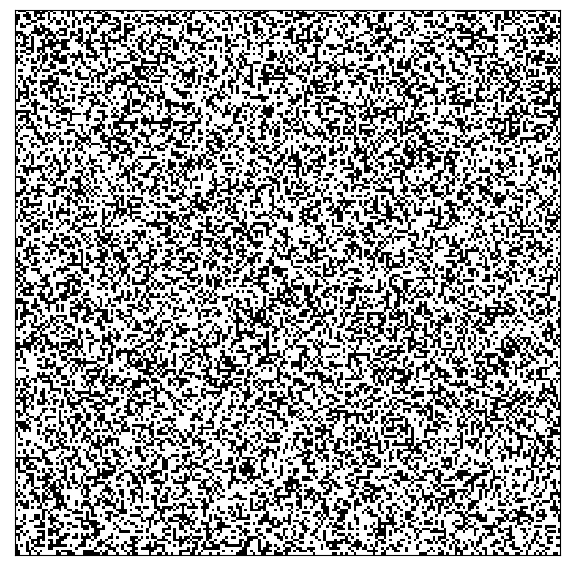

Begin energy: 140594.0     End energy: 73436.0


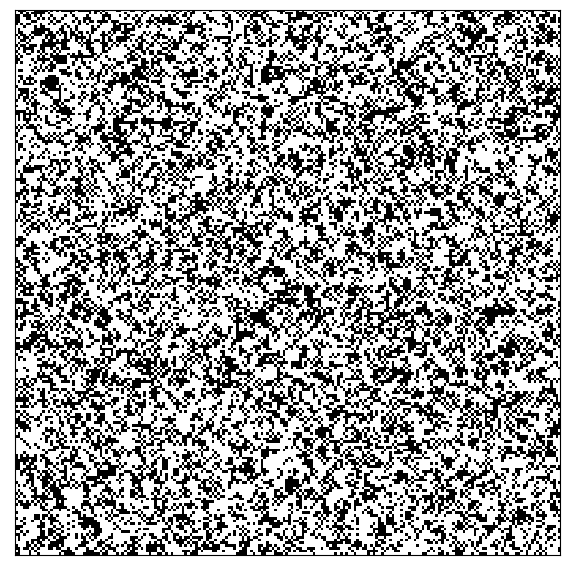

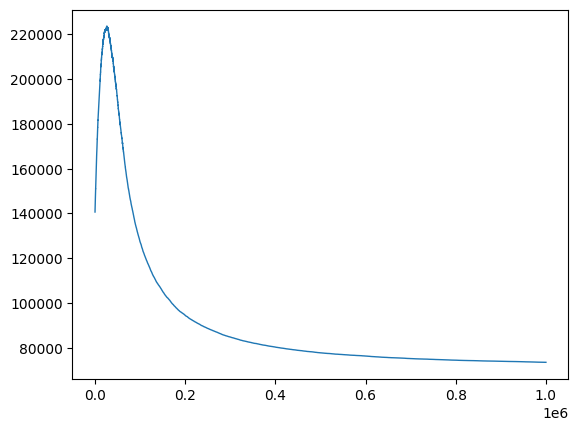

In [72]:
calculate_image(
    n=200,
    p=0.4,
    field_getter=four_neigh,
    max_iteration=10**6,
    temp=2000,
    alpha=0.9999,
)